# Introdução 
Kannada é um língua falada predominantemente pelo povo de Karnataka, localizada na região sudoeste da Índia. Essa língua possui aproximandente 45 milhões de praticantes.

O objetivo desse projeto é construir uma Rede Neural Convulucional (CNN) que consiga interpretar a escrita kannadense a partir de um banco de dados, onde há mais de 60.000 imagens de 0 a 9, escritos a mão, em kannadense


In [1]:
# Importando bibliotecas 
import pandas as pd
import seaborn as sns
import numpy as  np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=UserWarning)
warnings.filterwarnings("ignore", category=FutureWarning)

pd.options.display.max_columns = None
%matplotlib inline

In [2]:
# Transformando datasets em dataframes
train = pd.read_csv('Kannada-MNIST/train.csv')
test = pd.read_csv('Kannada-MNIST/test.csv')
extra = pd.read_csv('Kannada-MNIST/Dig-MNIST.csv') 

___
# Conhecendo os dados 

Cada imagem possui 28 pixels em altura e 28 em comprimento, o que totaliza 784 pixels por imagem (28x28). Cada pixel tem o seu próprio valor associado, o que indica o tom claro e escuro do respectivo pixel.

Para podermos observar melhor essas imagens e como elas se comportam, realizaremos uma análise desses dados. 

In [3]:
# Checando o tamanho do nosso dataframe 
print('O dataframe de TREINO possui {} LINHAS e {} COLUNAS'.format(train.shape[0], train.shape[1]))
print('O dataframe de TESTE possui {} LINHAS e {} COLUNAS'.format(test.shape[0], test.shape[1]))

O dataframe de TREINO possui 60000 LINHAS e 785 COLUNAS
O dataframe de TESTE possui 5000 LINHAS e 785 COLUNAS


In [4]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,pixel49,pixel50,pixel51,pixel52,pixel53,pixel54,pixel55,pixel56,pixel57,pixel58,pixel59,pixel60,pixel61,pixel62,pixel63,pixel64,pixel65,pixel66,pixel67,pixel68,pixel69,pixel70,pixel71,pixel72,pixel73,pixel74,pixel75,pixel76,pixel77,pixel78,pixel79,pixel80,pixel81,pixel82,pixel83,pixel84,pixel85,pixel86,pixel87,pixel88,pixel89,pixel90,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel161,pixel162,pixel163,pixel164,pixel165,pixel166,pixel167,pixel168,pixel169,pixel170,pixel171,pixel172,pixel173,pixel174,pixel175,pixel176,pixel177,pixel178,pixel179,pixel180,pixel181,pixel182,pixel183,pixel184,pixel185,pixel186,pixel187,pixel188,pixel189,pixel190,pixel191,pixel192,pixel193,pixel194,pixel195,pixel196,pixel197,pixel198,pixel199,pixel200,pixel201,pixel202,pixel203,pixel204,pixel205,pixel206,pixel207,pixel208,pixel209,pixel210,pixel211,pixel212,pixel213,pixel214,pixel215,pixel216,pixel217,pixel218,pixel219,pixel220,pixel221,pixel222,pixel223,pixel224,pixel225,pixel226,pixel227,pixel228,pixel229,pixel230,pixel231,pixel232,pixel233,pixel234,pixel235,pixel236,pixel237,pixel238,pixel239,pixel240,pixel241,pixel242,pixel243,pixel244,pixel245,pixel246,pixel247,pixel248,pixel249,pixel250,pixel251,pixel252,pixel253,pixel254,pixel255,pixel256,pixel257,pixel258,pixel259,pixel260,pixel261,pixel262,pixel263,pixel264,pixel265,pixel266,pixel267,pixel268,pixel269,pixel270,pixel271,pixel272,pixel273,pixel274,pixel275,pixel276,pixel277,pixel278,pixel279,pixel280,pixel281,pixel282,pixel283,pixel284,pixel285,pixel286,pixel287,pixel288,pixel289,pixel290,pixel291,pixel292,pixel293,pixel294,pixel295,pixel296,pixel297,pixel298,pixel299,pixel300,pixel301,pixel302,pixel303,pixel304,pixel305,pixel306,pixel307,pixel308,pixel309,pixel310,pixel311,pixel312,pixel313,pixel314,pixel315,pixel316,pixel317,pixel318,pixel319,pixel320,pixel321,pixel322,pixel323,pixel324,pixel325,pixel326,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455

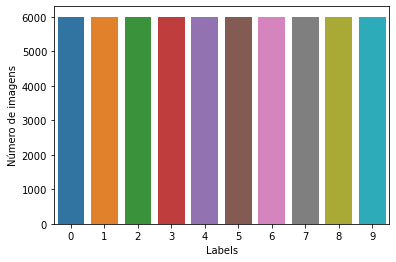

In [5]:
sns.barplot(train.label.value_counts().index, train.label.value_counts())
plt.xlabel('Labels')
plt.ylabel('Número de imagens')
plt.show()

Aqui plotamos um gráfico de barra para entendermos como está a distribuição das imagens. No nosso dataset, podemos observar que o número de imagens está uniformemente distribuido, o que nos leva a não precisar realizar algum tratamento ou manipulação em relação à quantidade para cada label.

In [6]:
train.label.value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

Para cada label, temos 6.000 imagens, o que é um bom número para se trabalhar. 

Em seguida, vamos plotar uma das imagens. Como os pixels estão distribuídos em 784 colunas, precisamos reagrupá-las de forma que estajam no formato 28x28. Por isso utilizaremos o reshape.

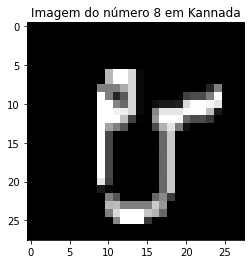

In [7]:
num = 8
number = train.iloc[num,1:].values.reshape(28,28)
plt.imshow(number, cmap=plt.get_cmap('gray'))
plt.title('Imagem do número {} em Kannada'.format(str(num)))
plt.show()

Temos uma boa noção sobre o dataset que estamos trabalhando! Agora iniciaremos o processo de montagem do nosso CNN.

___
# Pré-processamento dos dados 

Para podermos utlizar as imagens como inputs no CNN, precisamos realizar alguns processamentos.

Iniciaremos com uma separação do nosso target 

In [8]:
# Separando feature e targets 
X_train=train.drop('label',axis=1)
Y_train=train.label

Para podermos acelerar o processo de treinamento do nosso modelo, realizaremos uma normalização. Em outras palavras, já que os valores do pixel variam entre 0 e 255, dividiremos todos os valores por 255, desse modo, os inputs terão valores "leves" para serem trabalhadas no CNN. No final, os valores do pixels vão variar entre 0 e 1.

In [9]:
X_train = X_train/255
test = test/255

Também, passaremos as variáveis dos labels de numéricas para categóricas: 

In [10]:
from tensorflow.keras.utils import to_categorical

Y_train = to_categorical(Y_train)

Estamos prestes a montar o nosso CNN. O passo final antes de iniciar a montagem seria separar o nosso train com o auxilio do sklearn.

Decidimos utilizar a proporção de 70% e 30%

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size = 0.3, random_state=42) 

E mais um detalhe imporante!

Como dito antes, os pixels estão distribuídas de forma linear em 784 colunas, então precisamos agrupá-los no formato 28x28x1:

In [12]:
x_train = x_train.values.reshape(-1,28,28,1) 
x_val = x_val.values.reshape(-1,28,28,1)
test = test.iloc[:, 1:].values.reshape(-1,28,28,1)

___
# Modelo 

Antes de montarmos o modelo, vamos explicar brevemente sobre redes neurais convulacionais.

### *Convolutional Neural Network (CNN)* 

A convolução é uma operação linear que relacionas duas matrizes, resultando em uma terceira, normalmente chamada de feature map. No contexto de imagens, podemos entender esse processo como um filtro/kernel que transforma uma imagem de entrada.

Um kernel é uma matriz utilizada para uma operação de multiplicação de matrizes. Esta operação é aplicada diversas vezes em diferentes regiões da imagem. A cada aplicação, a região é alterada por um parâmetro conhecido como stride. Normalmente o stride possui o valor 1, o que significa que a transformação será aplicada em todos os pixels da imagem. Cada kernel possui uma função importante, como detecção de linhas horizontais e verticais. A cada vez que se aprofunda nas camadas da rede neural, a complexidade da sua função aumenta, como detecção de um nariz, por exemplo. Um exemplo dessa transformação é ilustrado abaixo.

<img src="img/conv.png"> 

Cada elemento da matriz principal é multiplicado ao respectivo elemento do kernel. O elemento da feature map é a somatória desses produtos. Abaixo segue um gif que representa esse processo:

<img src="img/conv_gif.gif"> 

É possível observar que a matriz resultante desse exemplo possui uma dimensionalidade menor que a imagem de origem. Muitas convoluções podem impactar na assertividade da CNN se o tamanho da imagem for muito reduzido. Para contornar esse cenário, normalmente é utilizado o conceito de Padding.

### *Padding* 

Padding é um processo em que alguns pixels são adicionados ao redor da imagem antes da operação de convolução, de forma a manter a dimensionalidade na imagem resultante durante a operação. No caso abaixo, foram adicionados pixels com valores 0.

Graças ao padding, a imagem pode ser convolucionada sem perder qualidade e informação

<img src="img/padding.png"> 

### *ReLu*

Uma rede neural sem função de ativação torna-se um modelo linear. Se o problema é linear, existem outros modelos mais simples que podem atender tão bem quanto uma rede neural. Infelizmente a maioria dos problemas complexos não são lineares. Portanto, para adicionar a não linearidade a rede, é ultilizada as funções de ativação. Nos dias de hoje, e principalmente no contexto de imagens, a mais utilizada é a função ReLU.
Matematicamente a função ReLU é definida como y = max(0, x). 

O gráfico a seguir é a ilustração desta função.

<img src="img/relu.png"> 

### *Pooling*

Pooling é um processo de downsamping. É um processo simples de redução da dimensionalidade/features maps. Em outras palavras, é uma transformação que reduz o tamanho da imagem.

O pooling previne o modelo de treinar mais do que devia, pois ele acaba descartando os dados irrelevantes de um certo valor. Isso só não traz maior eficiência na extração de features, mas acaba acelerando a velocidade de computação dos dados.  

<img src="img/pooling.jpeg"> 

Existem 3 operações diferentes de Pooling (MaxPooling, SumPooling, AvaragePooling). Todas elas seguem o mesmo princípio e só se diferem na forma como calculam o valor final. A mais utilizada nos dias de hoje é a MaxPooling.

A operação de MaxPooling retira o maior elemento de determinada região da matriz (considerando o tamanho do pool aplicado). Posteriormente, é feito um deslizamento considerando um parâmetro de stride (similar a a operação de convolução) para aplicação de uma nova operação.

<img src="img/max_pooling.jpeg"> 

### *Dropout*

Dropout não é uma especificidade de uma CNN, porém a utilizaremos em nossa implementação técnica, portanto abordaremos seu funcionamento.

Em resumo, a camada de Dropout é utilizada para evitar que determinadas partes da rede neural tenham muita responsabilidade e consequentemente, possam ficar muito sensíveis a pequenas alterações.

Essa camada recebe um hyper-parâmetro que define uma probabilidade de “desligar” determinada área da rede neural durante o processo de treinamento.

### *Flatten*

Essa camada normalmente é utilizada na divisão das 2 partes da CNN (extração de características / rede neural tradicional ). Ela basicamente opera uma transformação na matrix da imagem, alterando seu formato para um array. 

No nosso caso, as iamgens possuem uma dimensão 28x28. O flatten irá transformanr essa matriz para um array de 784 posições. A imagem abaixo ilustra essa operação.

<img src="img/flatten.png"> 

*Fontes:* 
* https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-as-redes-neurais-convolucionais-utilizando-o-keras-41ee8dcc033e
* https://www.kaggle.com/shahules/indian-way-to-learn-cnn
* https://www.kaggle.com/benanakca/kannada-mnist-cnn-tutorial-with-app-top-2

Agora iniciaremos a montagem das nossas camadas. Também, aplicaremos algumas modificações em nossos dados de treinamento e utilizamremos algumas funções de auxílio. 

## *Implementação* 

In [13]:
# Importantando bibliotecas 
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPool2D,Dropout

In [14]:
# Segunda Itereção
model_1 = Sequential()
model_1.add(Conv2D(filters = 32,
                 kernel_size = (3,3),
                 padding = 'Same',
                 activation = 'relu',
                 input_shape = (28,28,1)))

model_1.add(MaxPool2D(pool_size = (2,2)))

model_1.add(Dropout(0.25))

model_1.add(Conv2D(filters = 64,
                 kernel_size = (3,3),
                 padding = 'Same',
                 activation = 'relu'))

model_1.add(MaxPool2D(pool_size = (2,2)))

model_1.add(Dropout(0.25))

model_1.add(Conv2D(filters = 128,
                 kernel_size = (3,3),
                 padding = 'Same',
                 activation = 'relu'))

model_1.add(Flatten())

model_1.add(Dense(256, activation = "relu"))

model_1.add(Dropout(0.5))

model_1.add(Dense(10, activation = "softmax"))

In [15]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 7, 7, 128)         7

### Data Augmentation

Escrituras feitas a mão podem variar de pessoa para pessoa, e isso pode afetar a acurácia do nosso modelo. Para evitarmos isso, vamos realizar uma expasão dos dados, conhecido como Data Augmentation. 

Uma expansão dos dados é basicamente realizar mudanças artificiais que simulem essas variações na escrita, onde os dados de treino sofrem tais alterações de forma que não sofram deformações. 

In [16]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(x_train)

### Otimizadores 

In [17]:
model_1.compile(optimizer = 'adam', loss='categorical_crossentropy' , metrics=['accuracy'])

### Callbacks

In [18]:
from keras.callbacks import ReduceLROnPlateau, EarlyStopping

learning_rate_reduction = ReduceLROnPlateau(monitor='val_loss', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=300, restore_best_weights=True)

### Avaliando primeira performance 

In [19]:
epochs = 30
batch_size = 1024

Epoch 1/30
46/46 [==============================] - 20s 440ms/step - loss: 0.8610 - accuracy: 0.7120 - val_loss: 0.0945 - val_accuracy: 0.9710
Epoch 2/30
46/46 [==============================] - 23s 493ms/step - loss: 0.2192 - accuracy: 0.9300 - val_loss: 0.0559 - val_accuracy: 0.9824
Epoch 3/30
46/46 [==============================] - 23s 495ms/step - loss: 0.1411 - accuracy: 0.9561 - val_loss: 0.0460 - val_accuracy: 0.9851
Epoch 4/30
46/46 [==============================] - 22s 471ms/step - loss: 0.1121 - accuracy: 0.9660 - val_loss: 0.0371 - val_accuracy: 0.9887
Epoch 5/30
46/46 [==============================] - 22s 472ms/step - loss: 0.0962 - accuracy: 0.9709 - val_loss: 0.0373 - val_accuracy: 0.9868
Epoch 6/30
46/46 [==============================] - 22s 472ms/step - loss: 0.0788 - accuracy: 0.9761 - val_loss: 0.0253 - val_accuracy: 0.9926
Epoch 7/30
46/46 [==============================] - 22s 475ms/step - loss: 0.0732 - accuracy: 0.9774 - val_loss: 0.0356 - val_accuracy: 0.9901

Text(0, 0.5, 'accuracy')

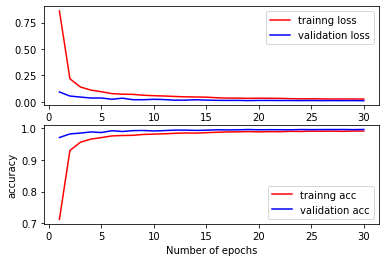

In [20]:
history = model_1.fit(datagen.flow(x_train, y_train, batch_size = batch_size,), 
                      epochs = epochs,
                      validation_data = (x_val, y_val), 
                      validation_steps = 50,
                      steps_per_epoch = x_train.shape[0] // batch_size,
                      callbacks = [learning_rate_reduction, es])

# Resultado da primeira iteração
fig, ax = plt.subplots(2,1)
fig.set
x = range(1,1+epochs)
ax[0].plot(x, history.history['loss'], color='red')
ax[0].plot(x, history.history['val_loss'], color='blue')

ax[1].plot(x, history.history['accuracy'], color='red')
ax[1].plot(x, history.history['val_accuracy'], color='blue')

ax[0].legend(['trainng loss','validation loss'])
ax[1].legend(['trainng acc','validation acc'])

plt.xlabel('Number of epochs')
plt.ylabel('accuracy')
plt.show()

In [21]:
model_1.evaluate(x_val, y_val, verbose=2);

375/375 - 2s - loss: 0.0118 - accuracy: 0.9966


### Matriz de Confusão 

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
y_predicted = model_1.predict(x_val)
y_grand_truth = y_val

y_predicted = np.argmax(y_predicted,axis=1)
y_grand_truth = np.argmax(y_grand_truth,axis=1)

cm = confusion_matrix(y_grand_truth, y_predicted)

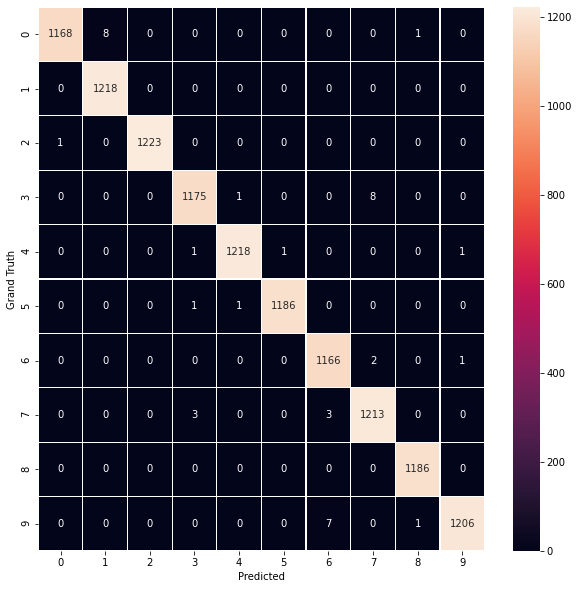

In [24]:
plt.figure(figsize=(10,10))
sns.heatmap(cm,fmt=".0f", annot=True, linewidths=0.1)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()

### Validação em cima de dados extras

In [37]:
x_extra = extra.drop('label',axis=1)
y_extra = extra.label

x_extra = x_extra/255

x_extra = x_extra.values.reshape(-1,28,28,1) 
y_extra = to_categorical(y_extra)

In [39]:
datagen.fit(x_extra)

In [40]:
model_1.evaluate(x_extra, y_extra);

320/320 [==============================] - 2s 5ms/step - loss: 0.8429 - accuracy: 0.8470


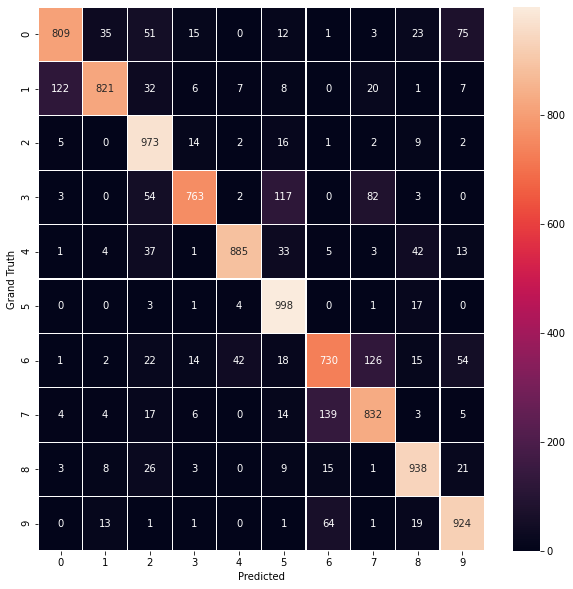

In [36]:
y_predicted_extra = model_1.predict(x_extra)
y_grand_truth_extra = y_extra

y_predicted_extra = np.argmax(y_predicted_extra, axis=1)
y_grand_truth_extra = np.argmax(y_grand_truth_extra,axis=1)

cm_extra = confusion_matrix(y_grand_truth_extra, y_predicted_extra)

plt.figure(figsize=(10,10))
sns.heatmap(cm_extra,fmt=".0f", annot=True, linewidths=0.1)
plt.xlabel("Predicted")
plt.ylabel("Grand Truth")
plt.show()